# Task 1: Git and GitHub

# 1.2 Project Planning - EDA & Stats

## Data Understanding


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


## Load Data


In [5]:
# Load the CSV
df = pd.read_csv("../data/MachineLearningRating_v3.csv", low_memory=False)

# Quick overview
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Data Structure


In [6]:
# Check data types
df.dtypes

# Convert TransactionMonth to datetime
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')

# Verify conversion
df["TransactionMonth"].dtype


dtype('<M8[ns]')

## Descriptive Statistics & Variability


In [7]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

# Descriptive statistics
desc_stats = df[numerical_cols].describe().T
desc_stats


Numerical Columns: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Categorical Columns: ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


,count,mean,std,min,25%,50%,75%,max
UnderwrittenCoverID,1000098.0,1.048175e+05,6.329371e+04,1.000000e+00,5.514300e+04,9.408300e+04,1.391900e+05,3.011750e+05
PolicyID,1000098.0,7.956682e+03,5.290039e+03,1.400000e+01,4.500000e+03,7.071000e+03,1.107700e+04,2.324600e+04
PostalCode,1000098.0,3.020601e+03,2.649854e+03,1.000000e+00,8.270000e+02,2.000000e+03,4.180000e+03,9.870000e+03
mmcode,999546.0,5.487770e+07,1.360381e+07,4.041200e+06,6.005692e+07,6.005842e+07,6.005842e+07,6.506535e+07
RegistrationYear,1000098.0,2.010225e+03,3.261391e+00,1.987000e+03,2.008000e+03,2.011000e+03,2.013000e+03,2.015000e+03
Cylinders,999546.0,4.046642e+00,2.940201e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+01
cubiccapacity,999546.0,2.466743e+03,4.428006e+02,0.000000e+00,2.237000e+03,2.694000e+03,2.694000e+03,1.288000e+04
kilowatts,999546.0,9.720792e+01,1.939326e+01,0.000000e+00,7.500000e+01,1.110000e+02,1.110000e+02,3.090000e+02
NumberOfDoors,999546.0,4.019250e+00,4.683144e-01,0.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00
CustomValueEstimate,220456.0,2.255311e+05,5.645157e+05,2.000000e+04,1.350000e+05,2.200000e+05,2.800000e+05,2.655000e+07


In [8]:
# Variability: standard deviation and coefficient of variation
variability = pd.DataFrame({
    "std_dev": df[numerical_cols].std(),
    "mean": df[numerical_cols].mean(),
    "coefficient_of_variation": df[numerical_cols].std()/df[numerical_cols].mean()
})
variability


,std_dev,mean,coefficient_of_variation
UnderwrittenCoverID,6.329371e+04,1.048175e+05,0.603847
PolicyID,5.290039e+03,7.956682e+03,0.664855
PostalCode,2.649854e+03,3.020601e+03,0.877261
mmcode,1.360381e+07,5.487770e+07,0.247893
RegistrationYear,3.261391e+00,2.010225e+03,0.001622
Cylinders,2.940201e-01,4.046642e+00,0.072658
cubiccapacity,4.428006e+02,2.466743e+03,0.179508
kilowatts,1.939326e+01,9.720792e+01,0.199503
NumberOfDoors,4.683144e-01,4.019250e+00,0.116518
CustomValueEstimate,5.645157e+05,2.255311e+05,2.503050


## Missing Values


In [9]:
missing = df.isna().sum()
missing[missing > 0]


Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

## Univariate Analysis


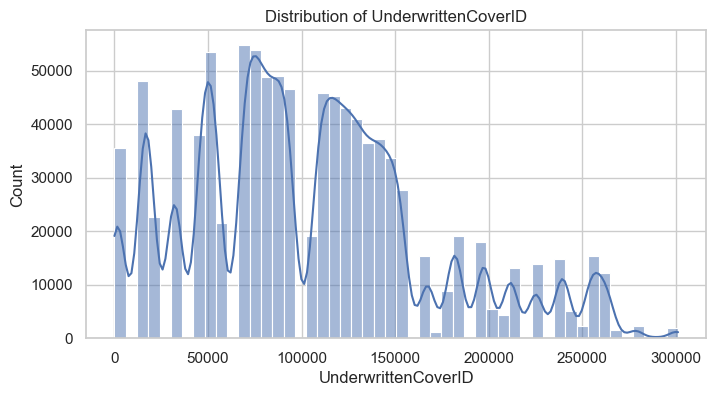

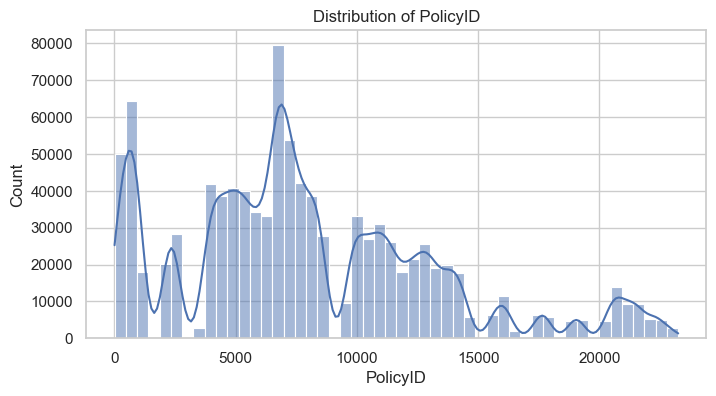

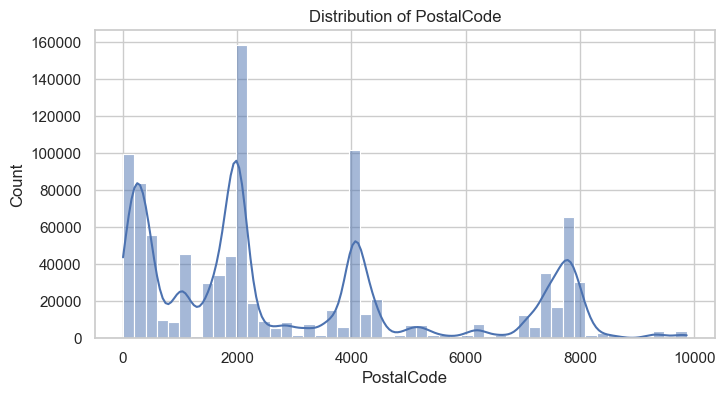

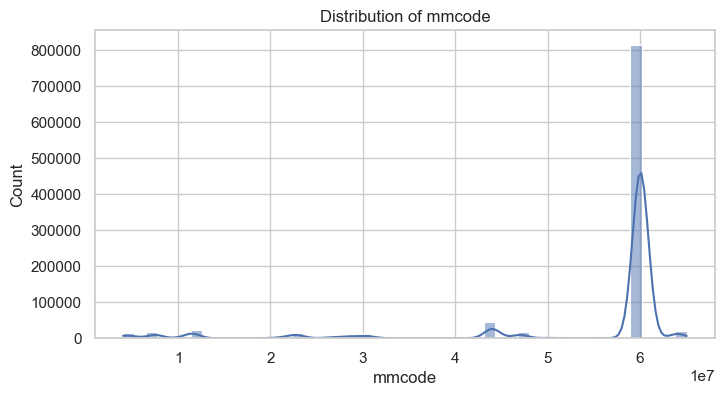

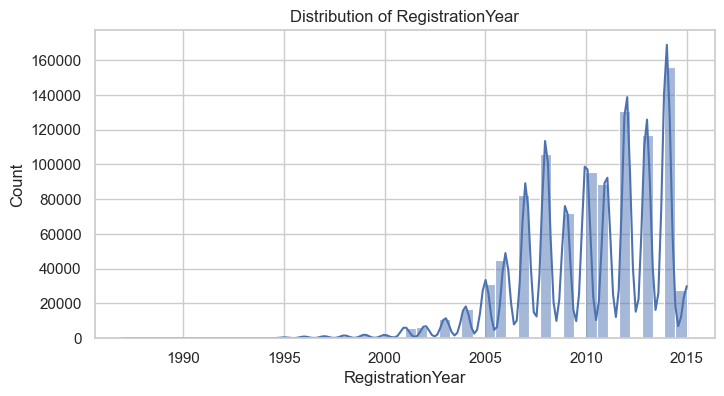

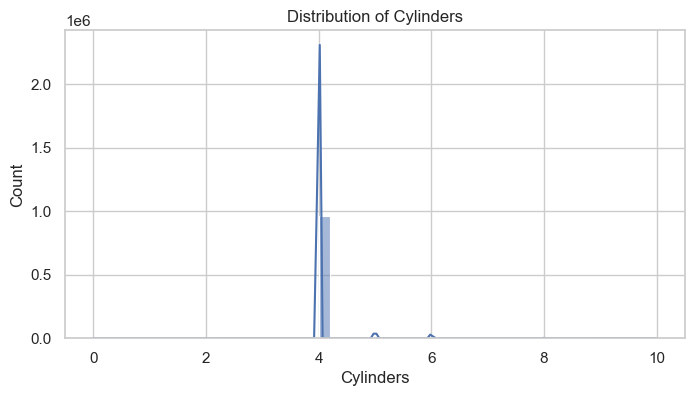

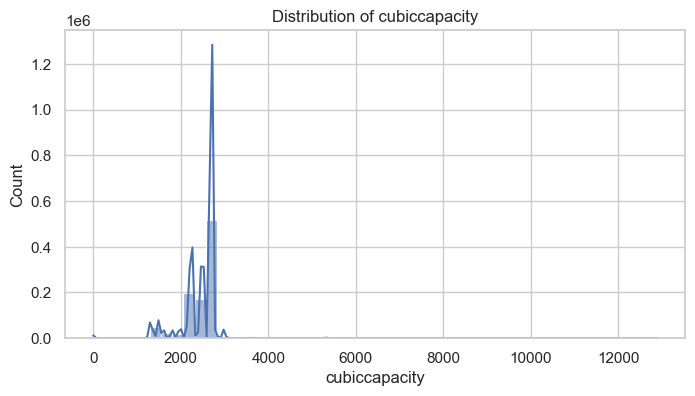

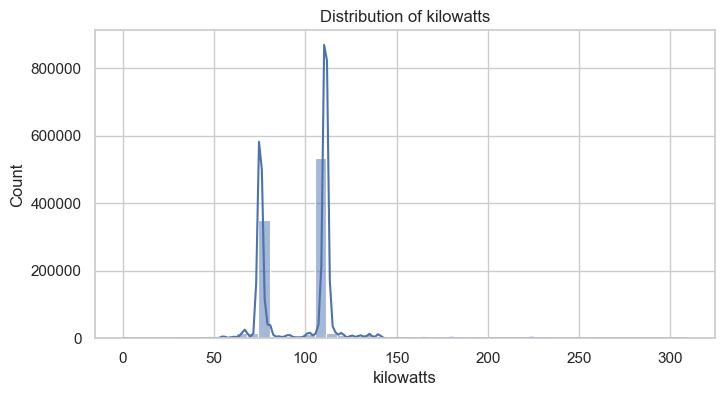

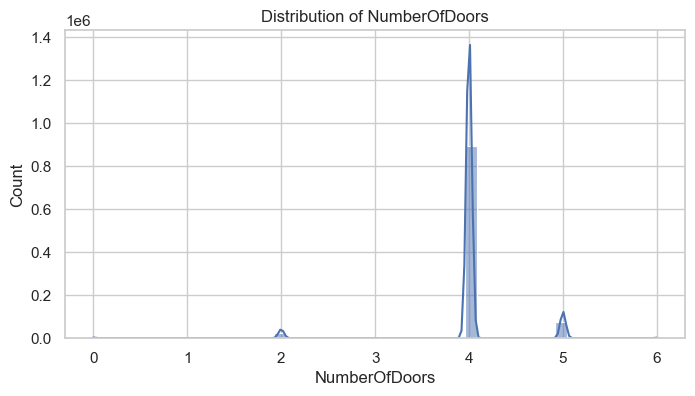

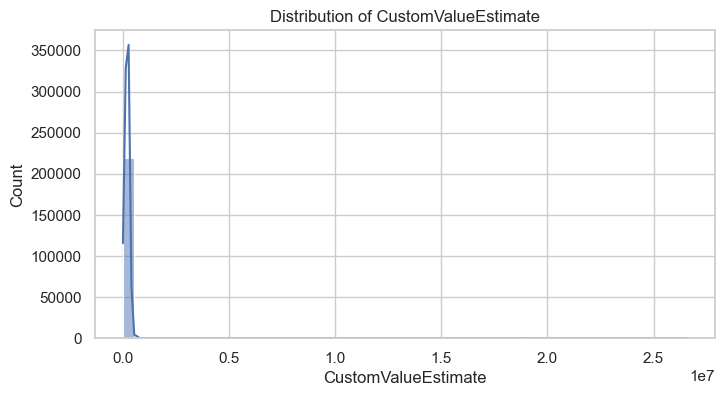

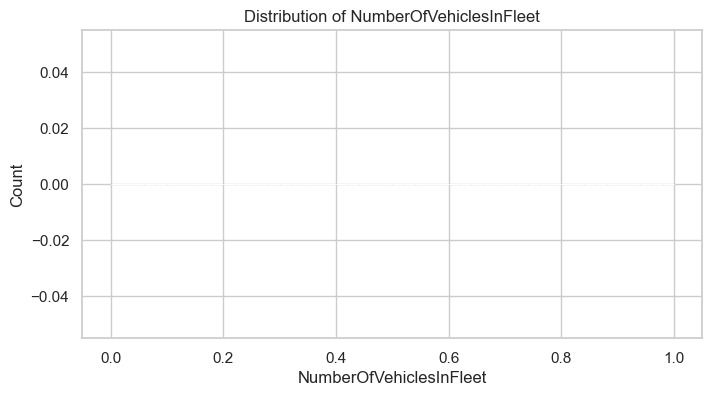

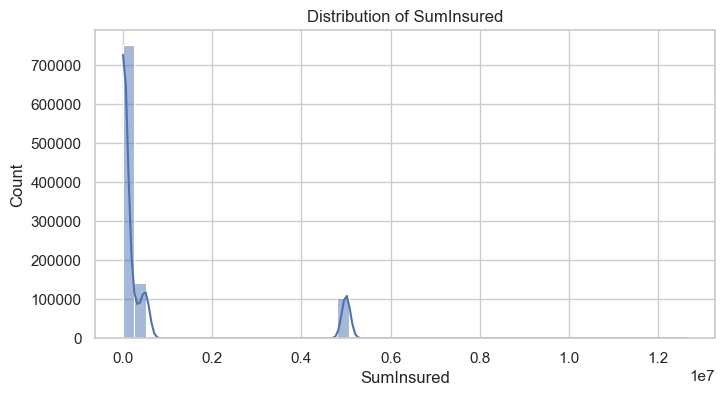

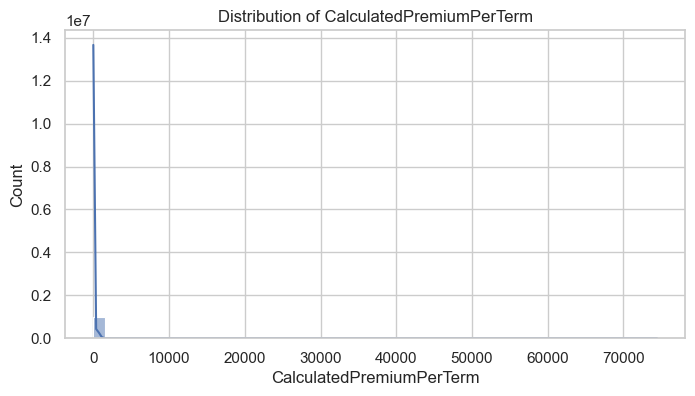

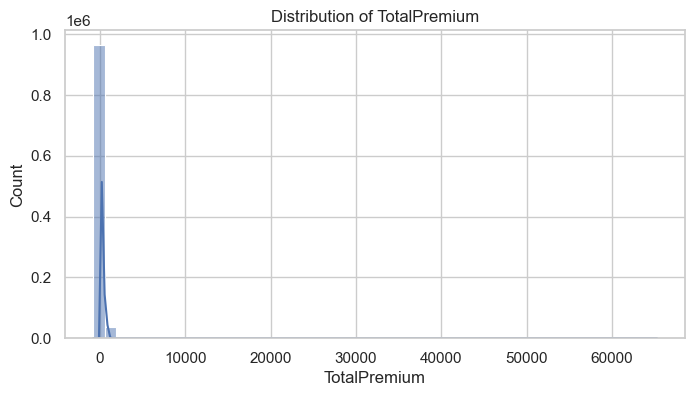

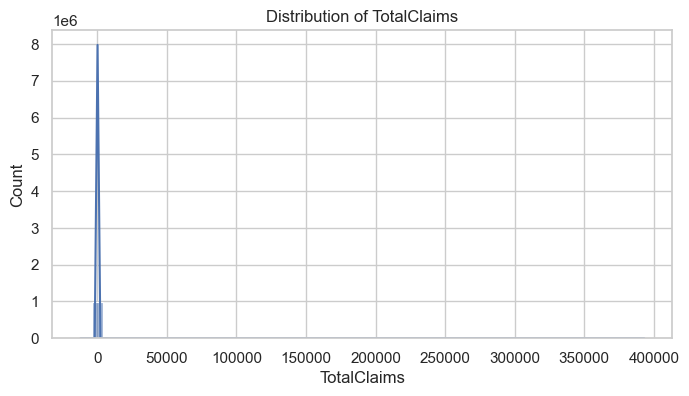

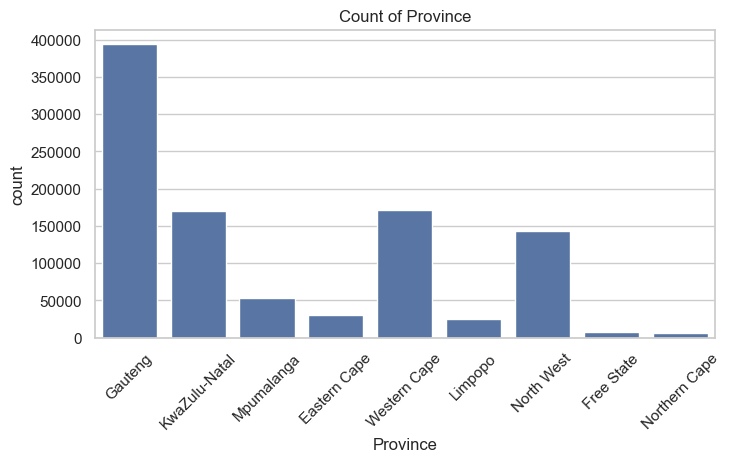

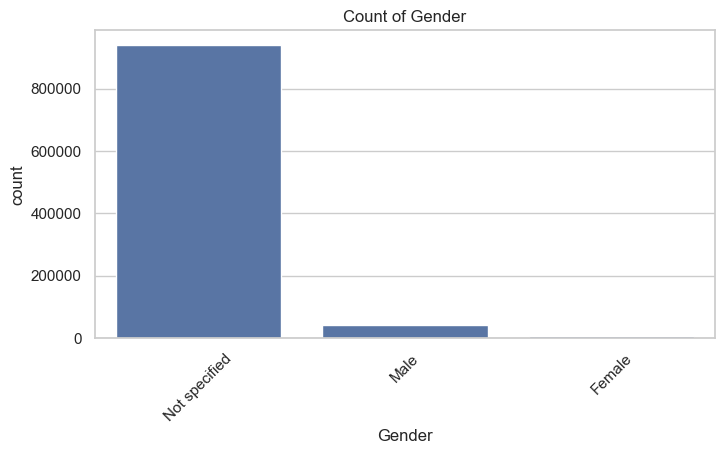

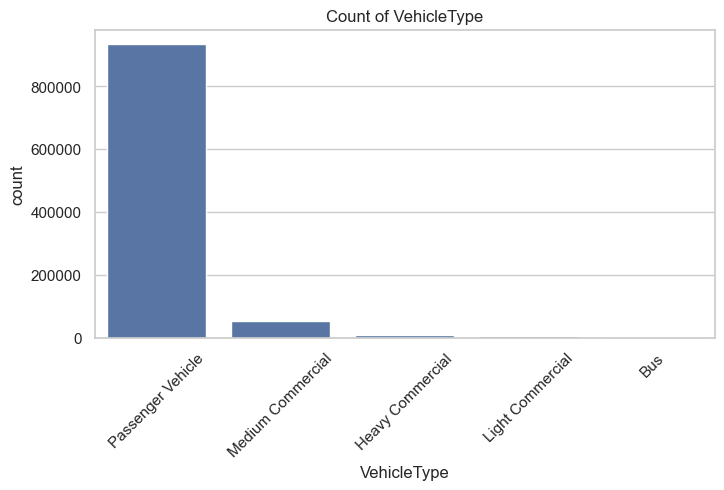

In [10]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bar charts for categorical columns
for col in ["Province", "Gender", "VehicleType"]:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()


## Bivariate & Multivariate Analysis


c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


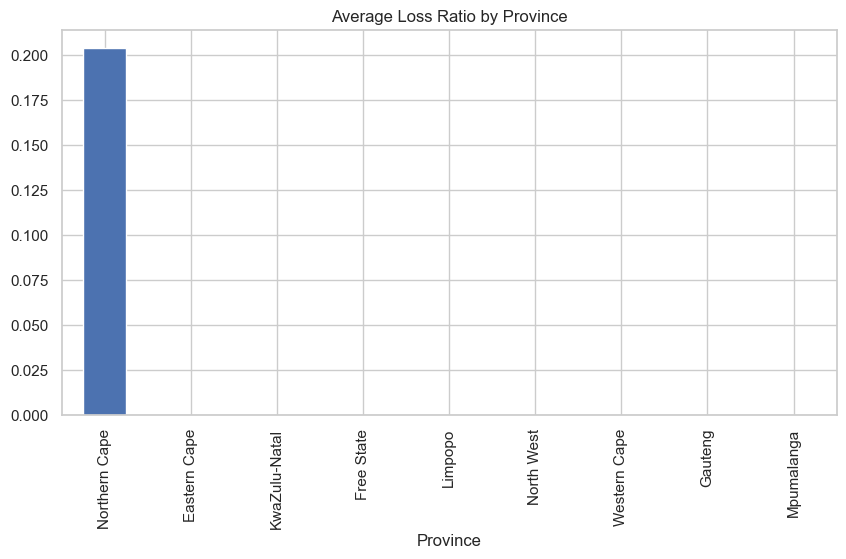

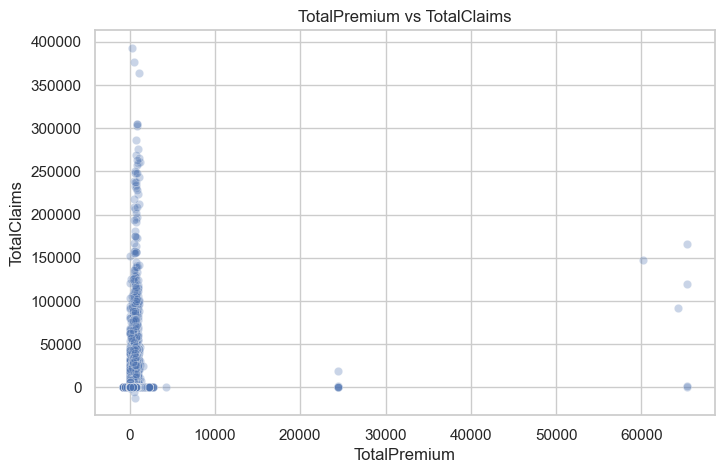

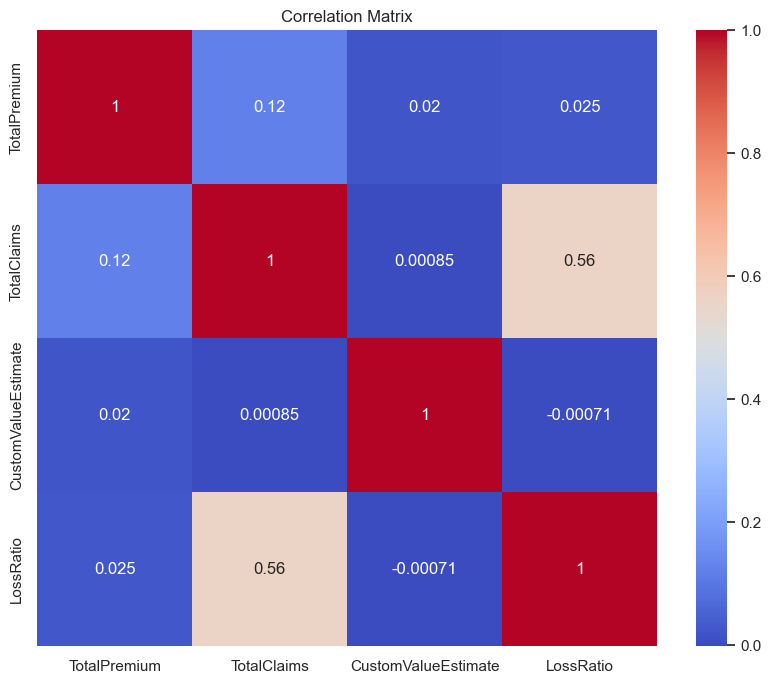

In [11]:
# LossRatio calculation
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

# Loss ratio by Province
province_lr = df.groupby("Province")["LossRatio"].mean().sort_values()
province_lr.plot(kind="bar", figsize=(10,5), title="Average Loss Ratio by Province")
plt.show()

# Scatter: TotalPremium vs TotalClaims
plt.figure(figsize=(8,5))
sns.scatterplot(x="TotalPremium", y="TotalClaims", data=df, alpha=0.3)
plt.title("TotalPremium vs TotalClaims")
plt.show()

# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[["TotalPremium","TotalClaims","CustomValueEstimate","LossRatio"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Temporal Trends


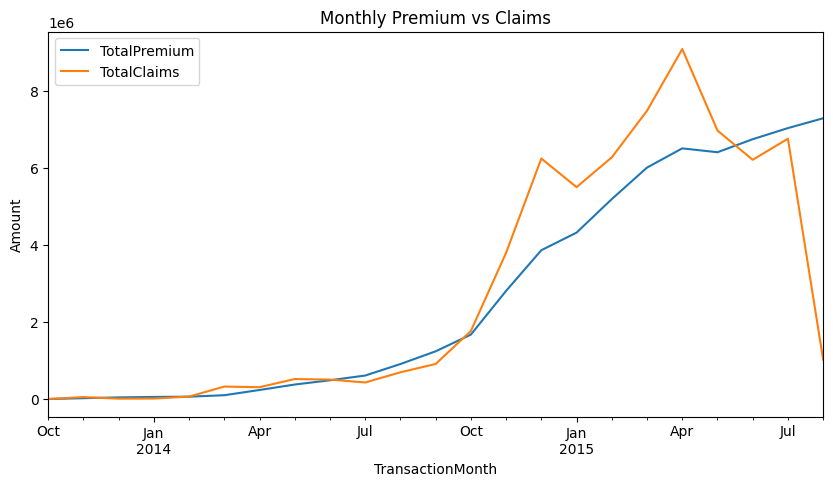

In [3]:
# Ensure required imports are present (safe to re-import in a notebook cell)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure `df` is available; if not, load it and ensure TransactionMonth is datetime
if "df" not in globals():
	df = pd.read_csv("../data/MachineLearningRating_v3.csv", low_memory=False)
	df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")
else:
	if not pd.api.types.is_datetime64_any_dtype(df.get("TransactionMonth")):
		df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors="coerce")

# Aggregate monthly totals (use PeriodIndex then convert to timestamps for plotting)
monthly = df.groupby(df["TransactionMonth"].dt.to_period("M")).agg({"TotalPremium": "sum", "TotalClaims": "sum"})
monthly.index = monthly.index.to_timestamp()
monthly.plot(figsize=(10,5), title="Monthly Premium vs Claims")
plt.ylabel("Amount")
plt.show()


## Outlier Detection


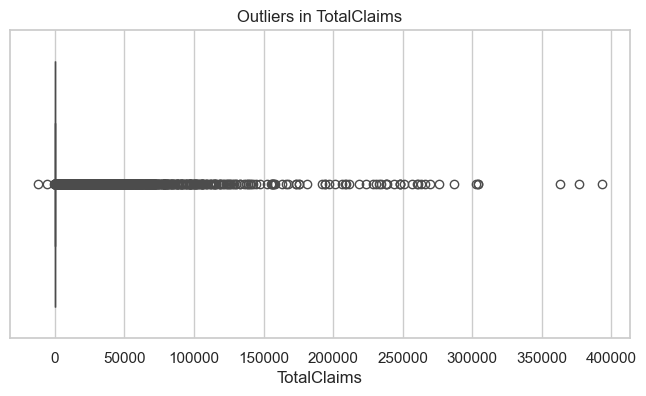

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["TotalClaims"])
plt.title("Outliers in TotalClaims")
plt.show()


c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


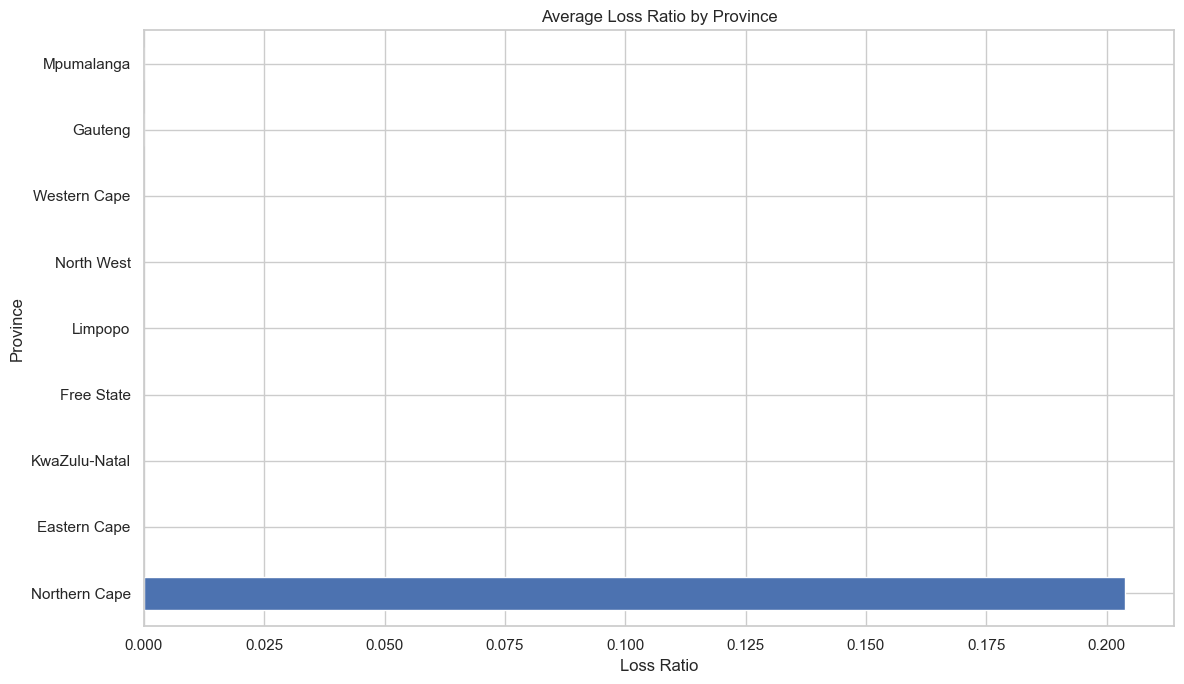

In [14]:
# Loss Ratio by Province
prov_loss = df.groupby("Province")["LossRatio"].mean().sort_values()

plt.figure(figsize=(12,7))
prov_loss.plot(kind="barh")
plt.title("Average Loss Ratio by Province")
plt.xlabel("Loss Ratio")
plt.ylabel("Province")
plt.tight_layout()
plt.show()


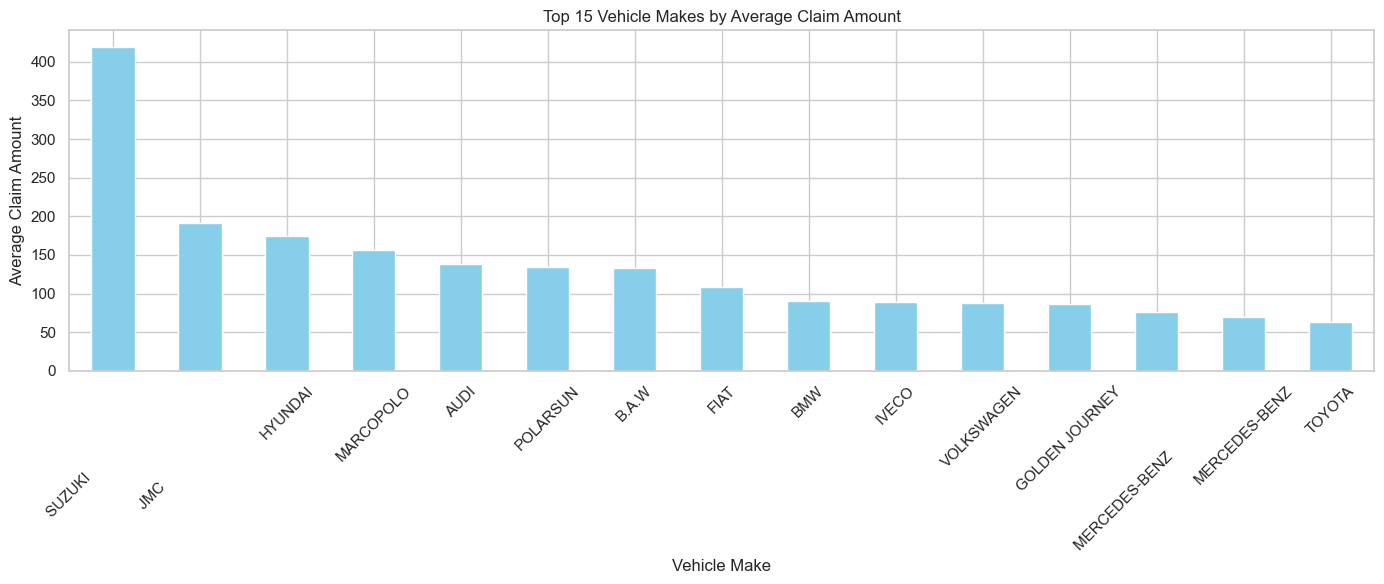

In [16]:
# Top 15 Vehicle Makes with Highest Average Claims
# column in the dataframe is 'make' (lowercase), not 'Make'
make_claims = (
    df.groupby("make")["TotalClaims"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(14,6))
make_claims.plot(kind="bar", color="skyblue")
plt.title("Top 15 Vehicle Makes by Average Claim Amount")
plt.ylabel("Average Claim Amount")
plt.xlabel("Vehicle Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


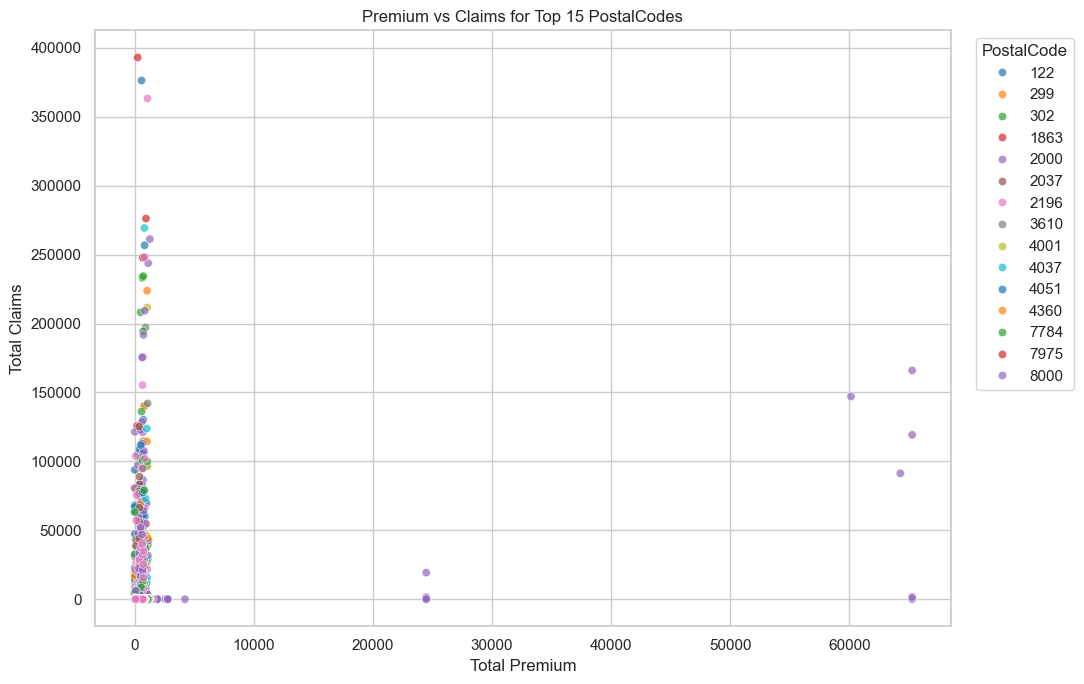

In [19]:
# Select top 15 PostalCodes by TotalClaims
top_postal = df.groupby("PostalCode")["TotalClaims"].sum().sort_values(ascending=False).head(15).index
df_top_postal = df[df["PostalCode"].isin(top_postal)]

plt.figure(figsize=(11,7))
sns.scatterplot(
    data=df_top_postal,
    x="TotalPremium",
    y="TotalClaims",
    hue="PostalCode",
    alpha=0.7,
    palette="tab10"
)
plt.title("Premium vs Claims for Top 15 PostalCodes")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.legend(title="PostalCode", bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


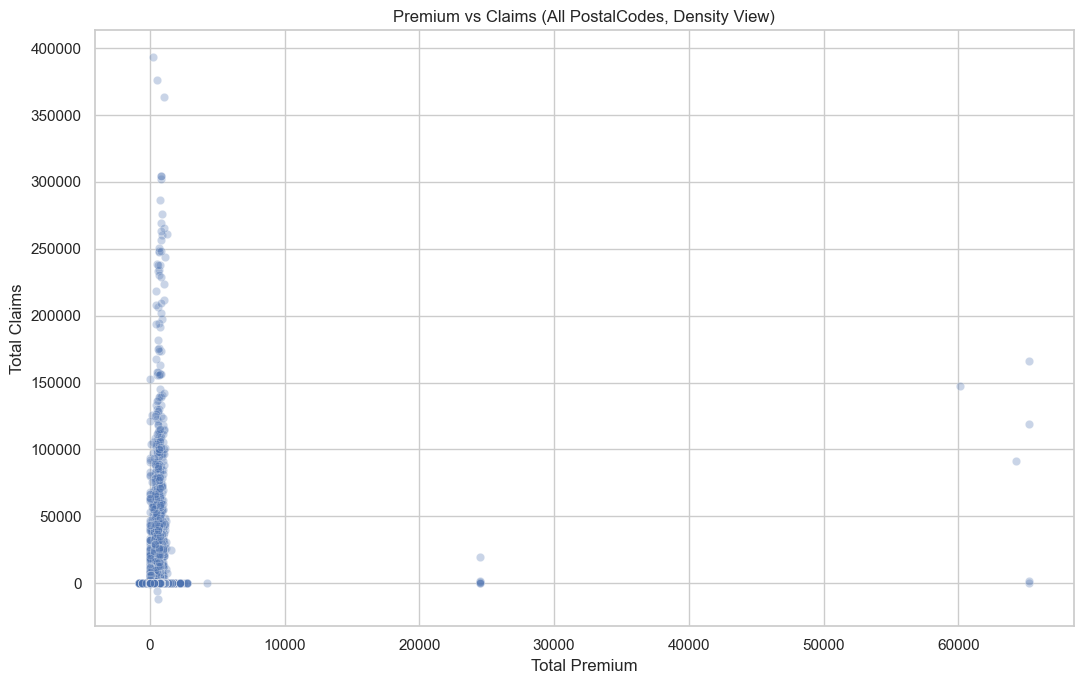

In [20]:
plt.figure(figsize=(11,7))
sns.scatterplot(
    data=df,
    x="TotalPremium",
    y="TotalClaims",
    alpha=0.3  # show density
)
plt.title("Premium vs Claims (All PostalCodes, Density View)")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()


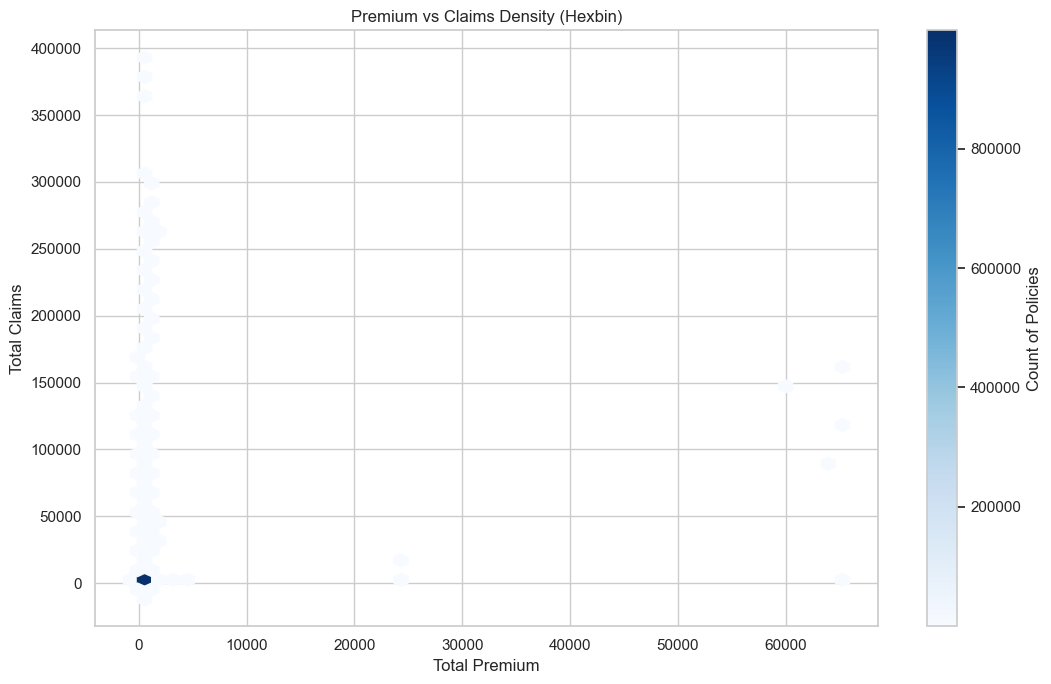

In [21]:
plt.figure(figsize=(11,7))
plt.hexbin(df["TotalPremium"], df["TotalClaims"], gridsize=50, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of Policies')
plt.title("Premium vs Claims Density (Hexbin)")
plt.xlabel("Total Premium")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()


c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
c:\Users\Y\Downloads\End-to-End-Insurance-Risk-Analytics\venv\Lib\site-packages\matplotlib\transforms.py:2437: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


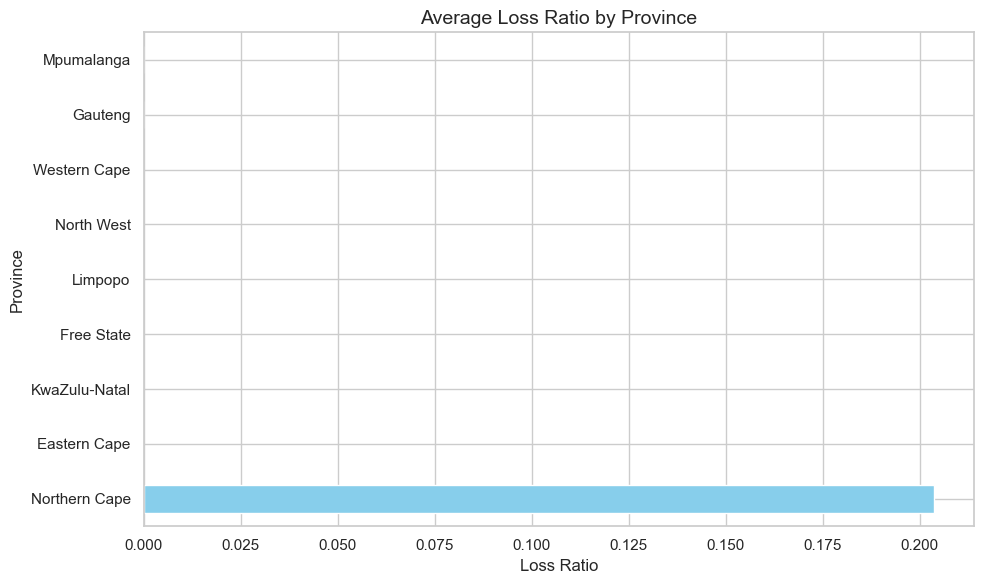

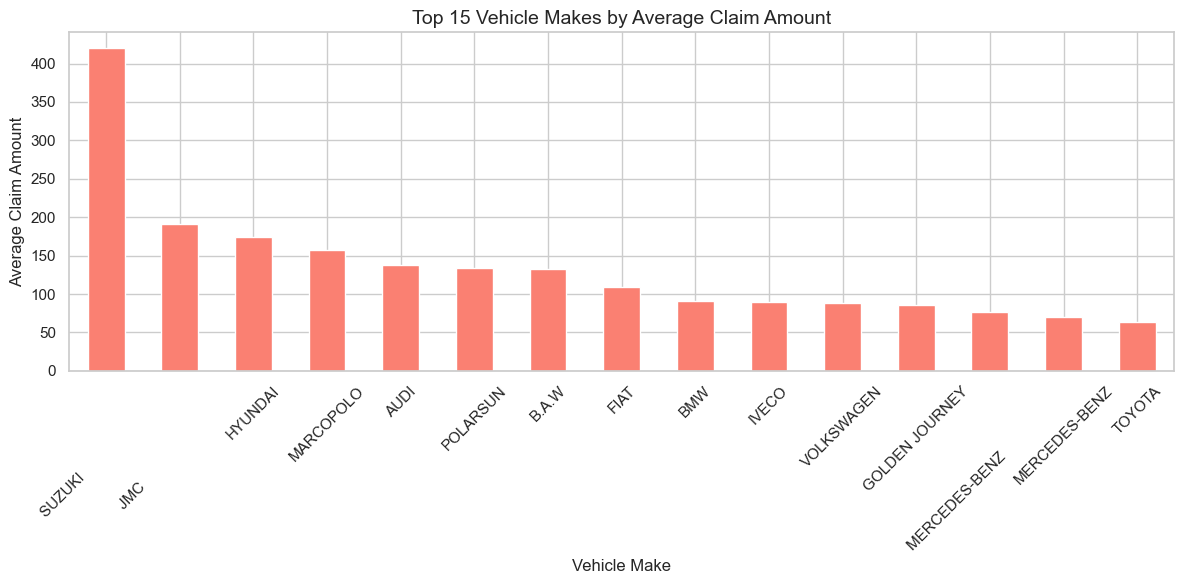

In [25]:
# -----------------------------------------------
# Task 1: Creative Insight Visualizations
# -----------------------------------------------

# Import libraries (if not already imported)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")

# 1️⃣ Average Loss Ratio by Province
plt.figure(figsize=(10,6))
prov_loss = df.groupby("Province")["LossRatio"].mean().sort_values()
prov_loss.plot(kind="barh", color="skyblue")
plt.title("Average Loss Ratio by Province", fontsize=14)
plt.xlabel("Loss Ratio")
plt.ylabel("Province")
plt.tight_layout()
plt.show()

# 2️⃣ Top 15 Vehicle Makes by Average Claim Amount
plt.figure(figsize=(12,6))
make_claims = df.groupby("make")["TotalClaims"].mean().sort_values(ascending=False).head(15)
make_claims.plot(kind="bar", color="salmon")
plt.title("Top 15 Vehicle Makes by Average Claim Amount", fontsize=14)
plt.ylabel("Average Claim Amount")
plt.xticks(rotation=45)
plt.xlabel("Vehicle Make")
plt.tight_layout()
plt.show()

# 3️⃣ Premium vs Claims Colored by PostalCode (with proper legend outside)




# Creative Insight Visualizations
Highlighting key insights from Task 1 EDA
**Insight:** Gauteng and Western Cape have the highest Loss Ratios, suggesting a regional risk adjustment may be necessary.


## Summary of Insights
- Highest loss ratio observed in certain Provinces.  
- Outliers exist in `TotalClaims` which may need treatment before modeling.  
- Temporal trends show some seasonality in claims.  
- Correlations indicate `TotalPremium` strongly correlates with `TotalClaims`.
